# Introduction to SQL
Timo Grossenbacher (Data Journalist)

## Your first database

### Introduction to relational databases

Investigating universities in Switzerland

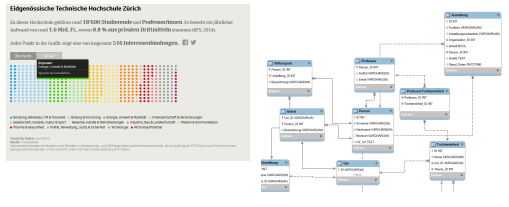
- guarantee its quality thourought the process (used the database diagram to help)
- all rectangle converted into dataframe

A relational database:
- real-life entities become tables
- reduced redundancy
- data integrity by relationships


- e.g. professors , universities , companies
- e.g. only one entry in companies for the bank "Credit Suisse"
- e.g. a professor can work at multiple universities and companies , a company can employ multiple professors

Throughout this course you will
- work with the data I used for my investigation
- create a relational database from scratch learn three concepts: (helps preserve data quality in databases)
    - constraints
    - keys
    - referential integrity
- You'll need: Basic understanding of SQL, as taught in Introduction to SQL.

Your first duty: Have a look at the PostgreSQL database

In [ ]:
SELECT table_schema, table_name
FROM information_schema.tables;

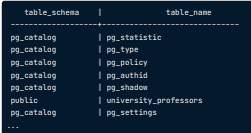

Have a look at the columns of a certain table

In [ ]:
SELECT table_name, column_name, data_type
FROM information_schema.columns
WHERE table_name = 'pg_config';

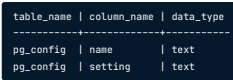

#### Information_schema 

Query information_schema with SELECT

information_schema is a meta-database that holds information about your current database. information_schema has multiple tables you can query with the known SELECT * FROM syntax:

- tables: information about all tables in your current database
- columns: information about all columns in all of the tables in your current database

In this exercise, you'll only need information from the 'public' schema, which is specified as the column table_schema of the tables and columns tables. The 'public' schema holds information about user-defined tables and databases. The other types of table_schema hold system information – for this course, you're only interested in user-defined stuff.

In [ ]:
#Example
-- Query the right table in information_schema
SELECT table_name 
FROM information_schema.tables
-- Specify the correct table_schema value
WHERE table_schema = 'public';

-- Query the right table in information_schema to get columns
SELECT column_name, data_type 
FROM information_schema.columns
WHERE table_name = 'university_professors' AND table_schema = 'public';

-- Query the first five rows of our table
SELECT * 
FROM university_professors 
LIMIT 5;

### Tables: At the core of every database

Redundancy in the university_professors table

In [ ]:
SELECT * FROM --professor is repeated some times
FROM university_professors
LIMIT 3;

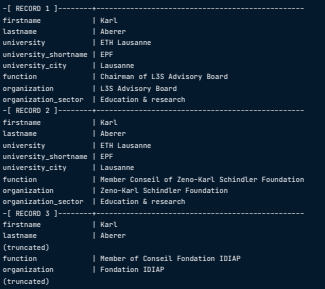

- professors: blue
- university: green
- organisation: brown
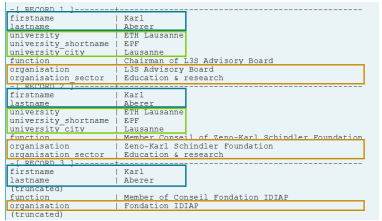

Currently: One "entity type" in the database (entity relation diagram)

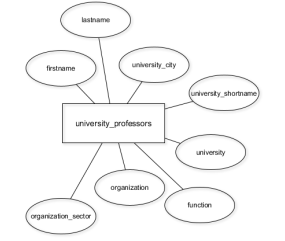

A better database model with three entity types

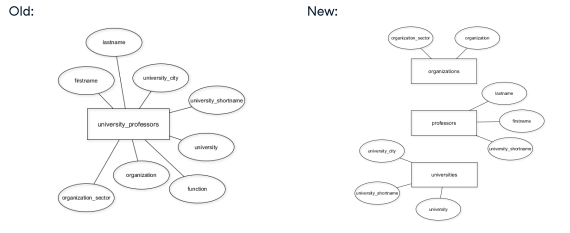

A better database model with four entity types

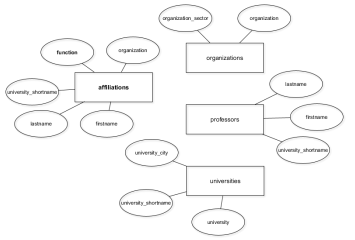

Create new tables with CREATE TABLE

In [ ]:
CREATE TABLE table_name (
    column_a data_type,
    column_b data_type,
    column_c data_type
);

In [ ]:
CREATE TABLE weather (
    clouds text,
    temperature numeric,
    weather_station char(5));

-- column name and data type

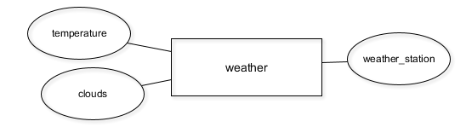

In [ ]:
#Example
-- Create a table for the professors entity type
CREATE TABLE professors (
 firstname text,
 lastname text
);

-- Print the contents of this table
SELECT * 
FROM professors

In [ ]:
#Example
-- Create a table for the universities entity type
CREATE TABLE universities (
    university_shortname text,
    university text,
    university_city text
);

-- Print the contents of this table
SELECT * 
FROM universities

#### Add column with ALTER TABLE 

Oops! We forgot to add the university_shortname column to the professors table. You've probably already noticed:

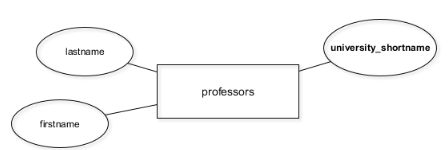

In chapter 4 of this course, you'll need this column for connecting the professors table with the universities table.

However, adding columns to existing tables is easy, especially if they're still empty.

To add columns you can use the following SQL query:

- ALTER TABLE table_name
- ADD COLUMN column_name data_type;

In [ ]:
#Example
-- Add the university_shortname column
ALTER TABLE professors
ADD COLUMN university_shortname text;

-- Print the contents of this table
SELECT * 
FROM professors

### Update your database as the structure changes

The current database model

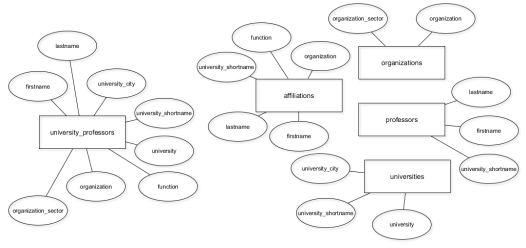

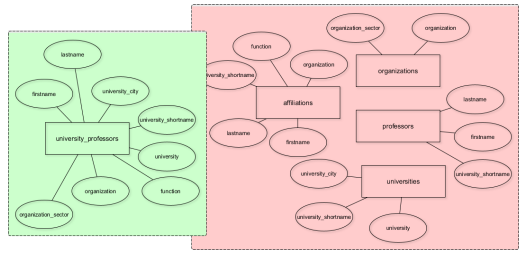

Only store DISTINCT data in the new tables

In [ ]:
SELECT COUNT(*)
FROM university_professors;
# count
# -----
# 1377

SELECT COUNT(DISTINCT organization)
FROM university_professors;
# count
# -----
# 1287

#### INSERT INTO (insert distinct)

INSERT DISTINCT records INTO the new tables

In [ ]:
INSERT INTO organizations #name of target table
SELECT DISTINCT organization,
    organization_sector
FROM university_professors;
# Output: INSERT 0 1287
    
INSERT INTO organizations
SELECT organization, #duplicate - no DISTINCT
    organization_sector
FROM university_professors;
# Output: INSERT 0 1377

The INSERT INTO statement

In [ ]:
INSERT INTO table_name (column_a, column_b)
VALUES ("value_a","value_b");

#### RENAME COLUMN 

RENAME a COLUMN in affiliations

In [ ]:
CREATE TABLE affiliations (
    firstname text,
    lastname text,
    university_shortname text,
    function text,
    organisation text
);

ALTER TABLE table_name
RENAME COLUMN old_name TO new_name;

#### DROP COLUMN 

DROP a COLUMN in affiliations

In [ ]:
CREATE TABLE affiliations (
    firstname text,
    lastname text,
    university_shortname text,
    function text,
    organization text);
ALTER TABLE table_name
DROP COLUMN column_name;

In [ ]:
SELECT DISTINCT firstname, lastname,
    university_shortname
FROM university_professors
ORDER BY lastname;

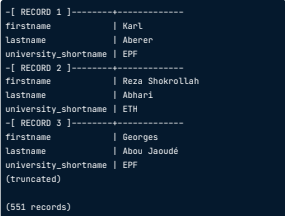

In [ ]:
SELECT DISTINCT firstname, lastname
FROM university_professors
ORDER BY lastname;

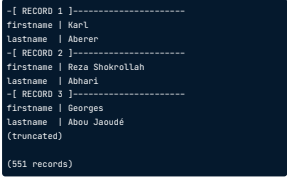

A professor is uniquely identified by firstname, lastname only

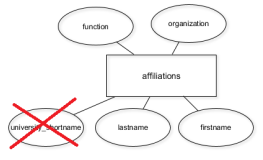

#### RENAME and DROP COLUMNs 

As mentioned in the video, the still empty affiliations table has some flaws. In this exercise, you'll correct them as outlined in the video.

You'll use the following queries:

- To rename columns:
    - ALTER TABLE table_name
    - RENAME COLUMN old_name TO new_name;
- To delete columns:
    - ALTER TABLE table_name
    - DROP COLUMN column_name;

In [ ]:
#Example
-- Rename the organisation column
ALTER TABLE affiliations
RENAME COLUMN organisation TO organization;

-- Delete the university_shortname column
ALTER TABLE affiliations
DROP COLUMN university_shortname;

#### INSERT INTO SELECT DISTINCT 

Migrate data with INSERT INTO SELECT DISTINCT
Now it's finally time to migrate the data into the new tables. You'll use the following pattern:

- INSERT INTO ... 
- SELECT DISTINCT ... 
- FROM ...;

It can be broken up into two parts:

First part:

- SELECT DISTINCT column_name1, column_name2, ... 
- FROM table_a;

This selects all distinct values in table table_a – nothing new for you.

Second part:

- INSERT INTO table_b ...;

Take this part and append it to the first, so it inserts all distinct rows from table_a into table_b.

One last thing: It is important that you run all of the code at the same time once you have filled out the blanks.

In [ ]:
-- Insert unique professors into the new table
INSERT INTO professors 
SELECT DISTINCT firstname, lastname, university_shortname 
FROM university_professors;

-- Doublecheck the contents of professors
SELECT * 
FROM professors;

In [ ]:
-- Insert unique affiliations into the new table
INSERT INTO affiliations 
SELECT DISTINCT firstname, lastname, function, organization 
FROM university_professors;

-- Doublecheck the contents of affiliations
SELECT * 
FROM affiliations;

#### DROP TABLE

In [ ]:
#Example
-- Delete the university_professors table
DROP TABLE university_professors;

## Enforce data consistency with attribute constaints

### Better data quality with constraints

Integrity constraints
- 1. Attribute constraints, e.g. data types on columns (Chapter 2)
- 2. Key constraints, e.g. primary keys (Chapter 3)
- 3. Referential integrity constraints, enforced through foreign keys (Chapter 4)

Why constraints?
- Constraints give the data structure
- Constraints help with consistency, and thus data quality
- Data quality is a business advantage / data science prerequisite
- Enforcing is difficult, but PostgreSQL helps

Data types as attribute constraints
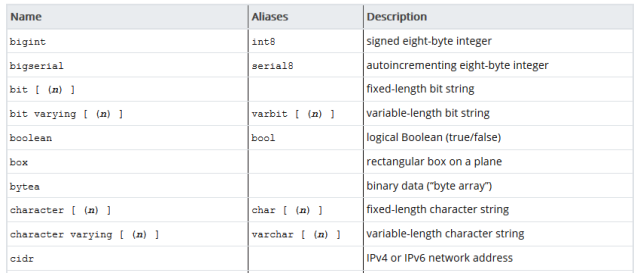
https://www.postgresql.org/docs/10/datatype.html

#### CAST 

Dealing with data types (casting)

In [ ]:
CREATE TABLE weather (
    temperature integer,
    wind_speed text);
SELECT temperature * wind_speed AS wind_chill #integer multiplied by text
FROM weather;
# operator does not exist: integer * text
# HINT: No operator matches the given name and argument type(s).
# You might need to add explicit type casts.

SELECT temperature * CAST(wind_speed AS integer) AS wind_chill #cast makes conversion
FROM weather;

For demonstration purposes, I created a fictional database table that only holds three records. The columns have the data types date, integer, and text, respectively.

CREATE TABLE transactions (
 transaction_date date, 
 amount integer,
 fee text
);

Have a look at the contents of the transactions table.

The transaction_date accepts date values. According to the PostgreSQL documentation, it accepts values in the form of YYYY-MM-DD, DD/MM/YY, and so forth.

Both columns amount and fee appear to be numeric, however, the latter is modeled as text – which you will account for in the next exercise.

In [ ]:
#Example
-- Let's add a record to the table
INSERT INTO transactions (transaction_date, amount, fee) 
VALUES ('2018-09-24', 5454, '30');

-- Doublecheck the contents
SELECT *
FROM transactions;

Type CASTs

In the video, you saw that type casts are a possible solution for data type issues. If you know that a certain column stores numbers as text, you can cast the column to a numeric form, i.e. to integer.

- SELECT CAST(some_column AS integer)
- FROM table;

Now, the some_column column is temporarily represented as integer instead of text, meaning that you can perform numeric calculations on the column.

In [ ]:
#Example
-- Calculate the net amount as amount + fee
SELECT transaction_date, amount + CAST(fee AS integer) AS net_amount 
FROM transactions;

### Working with data types

Working with data types
- Enforced on columns (i.e. attributes)
- Define the so-called "domain" of a column
- Define what operations are possible
- Enfore consistent storage of values

The most common types
- text : character strings of any length
- varchar [ (x) ] : a maximum of n characters
- char [ (x) ] : a xed-length string of n characters
- boolean : can only take three states, e.g. TRUE , FALSE and NULL (unknown)

From the PostgreSQL documentation

The most common types (cont'd.)
- date , time and timestamp : various formats for date and time calculations
- numeric : arbitrary precision numbers, e.g. 3.1457
- integer : whole numbers in the range of -2147483648 and +2147483647 (there is bigint for larger numbers)

From the PostgreSQL documentation.

#### Data Type 

Specifying types upon table creation

In [ ]:
CREATE TABLE students (
    ssn integer,
    name varchar(64),
    dob date,
    average_grade numeric(3, 2), -- e.g. 5.54
    tuition_paid boolean
);

#### ALTER COLUMN data type 

Alter types after table creation

In [ ]:
ALTER TABLE students
ALTER COLUMN name
TYPE varchar(128);

ALTER TABLE students
ALTER COLUMN average_grade
TYPE integer 
-- Turns 5.54 into 6, not 5, before type conversion
USING ROUND(average_grade);

Change types with ALTER COLUMN

The syntax for changing the data type of a column is straightforward. The following code changes the data type of the column_name column in table_name to varchar(10):

- ALTER TABLE table_name
- ALTER COLUMN column_name
- TYPE varchar(10)

Now it's time to start adding constraints to your database.

In [ ]:
#Example
-- Select the university_shortname column
SELECT DISTINCT(university_shortname) 
FROM professors;

-- Specify the correct fixed-length character type
ALTER TABLE professors
ALTER COLUMN university_shortname
TYPE char(3);

-- Change the type of firstname
ALTER TABLE professors
ALTER COLUMN firstname
TYPE varchar(64);

#### Convert USING function

Convert types USING a function

If you don't want to reserve too much space for a certain varchar column, you can truncate the values before converting its type.

For this, you can use the following syntax:

- ALTER TABLE table_name
- ALTER COLUMN column_name
- TYPE varchar(x)
- USING SUBSTRING(column_name FROM 1 FOR x)

You should read it like this: Because you want to reserve only x characters for column_name, you have to retain a SUBSTRING of every value, i.e. the first x characters of it, and throw away the rest. This way, the values will fit the varchar(x) requirement.

In [ ]:
-- Convert the values in firstname to a max. of 16 characters
ALTER TABLE professors 
ALTER COLUMN firstname 
TYPE varchar(16)
USING SUBSTRING (firstname FROM 1 FOR 16)

### The not-null and unique constraints 

The not-null constraint
- Disallow NULL values in a certain column
- Must hold true for the current state
- Must hold true for any future state

What does NULL mean?
- unknown
- does not exist
- does not apply
- ...

What does NULL mean? An example

In [ ]:
CREATE TABLE students (
    ssn integer not null,
    lastname varchar(64) not null,
    home_phone integer,
    office_phone integer
);
NULL != NULL

How to add or remove a not-null constraint

When creating a table...

In [ ]:
CREATE TABLE students (
    ssn integer not null,
    lastname varchar(64) not null,
    home_phone integer,
    office_phone integer
);

#### SET/DROP NOT NULL after created a column 

After the table has been created...

In [ ]:
ALTER TABLE students
ALTER COLUMN home_phone
SET NOT NULL;

ALTER TABLE students
ALTER COLUMN ssn
DROP NOT NULL;

#### UNIQUE constraint 

The unique constraint
- Disallow duplicate values in a column
- Must hold true for the current state
- Must hold true for any future state

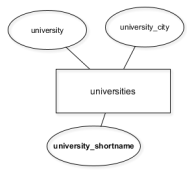

Adding unique constraints

In [ ]:
CREATE TABLE table_name (
    column_name UNIQUE
);

ALTER TABLE table_name
ADD CONSTRAINT some_name UNIQUE(column_name);

#### Disallow NULL 

Disallow NULL values with SET NOT NULL

The professors table is almost ready now. However, it still allows for NULLs to be entered. Although some information might be missing about some professors, there's certainly columns that always need to be specified.

In [ ]:
#Example
-- Disallow NULL values in firstname
ALTER TABLE professors 
ALTER COLUMN firstname SET NOT NULL;

-- Disallow NULL values in lastname
ALTER TABLE professors
ALTER COLUMN lastname SET NOT NULL

#### Constraint with UNIQUE

Make your columns UNIQUE with ADD CONSTRAINT

As seen in the video, you add the UNIQUE keyword after the column_name that should be unique. This, of course, only works for new tables:

CREATE TABLE table_name (
 column_name UNIQUE
);

If you want to add a unique constraint to an existing table, you do it like that:

- ALTER TABLE table_name
- ADD CONSTRAINT some_name UNIQUE(column_name);

Note that this is different from the ALTER COLUMN syntax for the not-null constraint. Also, you have to give the constraint a name some_name.

In [ ]:
#Example
-- Make universities.university_shortname unique
ALTER TABLE universities
ADD CONSTRAINT university_shortname_unq UNIQUE(university_shortname);

-- Make organizations.organization unique
ALTER TABLE organizations
ADD CONSTRAINT organization_unq UNIQUE (organization)

## Uniquely Identify records with key constraints

### Keys and superkeys

The current database model
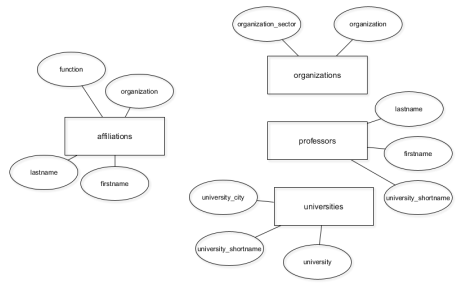

The database model with primary keys
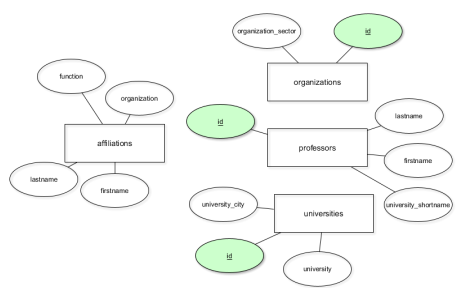

What is a key?
- Attribute(s) that identify a record uniquely
- As long as attributes can be removed: superkey
- If no more attributes can be removed: minimal superkey or key

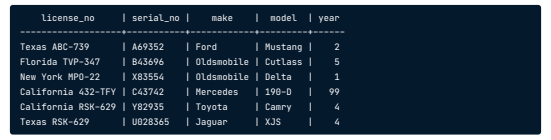

Examples of creating super keys:
- SK1 = {license_no, serial_no, make, model, year}
- SK2 = {license_no, serial_no, make, model}
- SK3 = {make, model, year}, SK4 = {license_no, serial_no}, SKi, ..., SKn

Adapted from Elmasri, Navathe (2011): Fundamentals of Database Systems, 6th Ed., Pearson

K1 = {license_no}; K2 = {serial_no}; K3 = {model}; K4 = {make, year}
- K1 to 3 only consist of one aribute
- Removing either "make" or "year" from K4 would result in duplicates
- Only one candidate key can be the chosen key

Get to know SELECT COUNT DISTINCT

Your database doesn't have any defined keys so far, and you don't know which columns or combinations of columns are suited as keys.

There's a simple way of finding out whether a certain column (or a combination) contains only unique values – and thus identifies the records in the table.

You already know the SELECT DISTINCT query from the first chapter. Now you just have to wrap everything within the COUNT() function and PostgreSQL will return the number of unique rows for the given columns:

- SELECT COUNT(DISTINCT(column_a, column_b, ...))
- FROM table;

In [ ]:
#Example
-- Count the number of rows in universities
SELECT COUNT(DISTINCT(university_shortname)) 
FROM universities;

-- Count the number of distinct values in the university_city column
SELECT COUNT(DISTINCT(university_city)) 
FROM universities;

Identify keys with SELECT COUNT DISTINCT

There's a very basic way of finding out what qualifies for a key in an existing, populated table:
- Count the distinct records for all possible combinations of columns. If the resulting number x equals the number of all rows in the table for a combination, you have discovered a superkey.
- Then remove one column after another until you can no longer remove columns without seeing the number x decrease. If that is the case, you have discovered a (candidate) key.

The table professors has 551 rows. It has only one possible candidate key, which is a combination of two attributes. You might want to try different combinations using the "Run code" button. Once you have found the solution, you can submit your answer.

In [ ]:
#Example
-- Try out different combinations
SELECT COUNT(DISTINCT(firstname, lastname)) 
FROM professors;

### Primary Keys

Primary keys
- One primary key per database table, chosen from candidate keys
- Uniquely identifies records, e.g. for referencing in other tables
- Unique and not-null constraints both apply
- Primary keys are time-invariant: choose columns wisely!

Specifying primary keys

In [ ]:
CREATE TABLE products (
    product_no integer UNIQUE NOT NULL,
    name text,
    price numeric
);

CREATE TABLE products (
    product_no integer PRIMARY KEY,
    name text,
    price numeric
);

CREATE TABLE example (
    a integer,
    b integer,
    c integer,
    PRIMARY KEY (a, c)
);

Taken from the PostgreSQL documentation: https://www.postgresql.org/docs/9.6/ddl-constraints.html#DDL-CONSTRAINTS-PRIMARY-KEYS

In [ ]:
ALTER TABLE table_name
ADD CONSTRAINT some_name PRIMARY KEY (column_name)

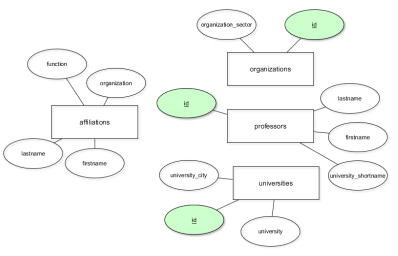

#### ADD CONSTRAINT PRIMARY KEY

ADD key CONSTRAINTs to the tables

Two of the tables in your database already have well-suited candidate keys consisting of one column each: organizations and universities with the organization and university_shortname columns, respectively.

In this exercise, you'll rename these columns to id using the RENAME COLUMN command and then specify primary key constraints for them. This is as straightforward as adding unique constraints (see the last exercise of Chapter 2):

- ALTER TABLE table_name
- ADD CONSTRAINT some_name PRIMARY KEY (column_name)

Note that you can also specify more than one column in the brackets

In [ ]:
#Example
-- Rename the organization column to id
ALTER TABLE organizations
RENAME COLUMN organization TO id;

-- Make id a primary key
ALTER TABLE organizations
ADD CONSTRAINT organization_pk PRIMARY KEY (id);


-- Rename the university_shortname column to id
ALTER TABLE universities
RENAME COLUMN university_shortname TO id;

-- Make id a primary key
ALTER TABLE universities
ADD CONSTRAINT university_pk PRIMARY KEY (id);

### Surrogate Keys

Surrogate keys
- Primary keys should be built from as few columns as possible
- Primary keys should never change over time

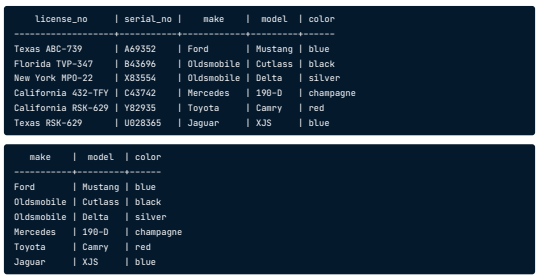

#### id serial to surrogate key 

Adding a surrogate key with serial data type

ALTER TABLE cars
ADD COLUMN id serial PRIMARY KEY;
INSERT INTO cars
VALUES ('Volkswagen','Blitz','black'); --new record will add it automatically

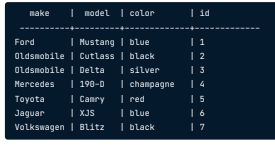

In [ ]:
INSERT INTO cars
VALUES ('Opel','Astra','green', 1);
# duplicate key value violates unique constraint "id_pkey"
# DETAIL: Key (id)=(1) already exists.

"id" uniquely identifies records in the table – useful for referencing!

#### CONCAT to create surrogate key 

Another type of surrogate key

In [ ]:
ALTER TABLE table_name
ADD COLUMN column_c varchar(256);

UPDATE table_name
SET column_c = CONCAT(column_a, column_b);

ALTER TABLE table_name
ADD CONSTRAINT pk PRIMARY KEY (column_c);

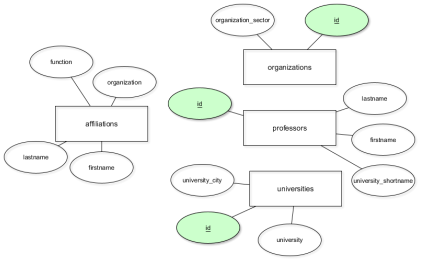

#### SERIAL surrogate key 

Add a SERIAL surrogate key

Since there's no single column candidate key in professors (only a composite key candidate consisting of firstname, lastname), you'll add a new column id to that table.

This column has a special data type serial, which turns the column into an auto-incrementing number. This means that, whenever you add a new professor to the table, it will automatically get an id that does not exist yet in the table: a perfect primary key!

In [ ]:
#eXAMPLE
-- Add the new column to the table
ALTER TABLE professors 
ADD COLUMN id serial;

-- Make id a primary key
ALTER TABLE professors 
ADD CONSTRAINT professors_pkey PRIMARY KEY (id);

-- Have a look at the first 10 rows of professors
SELECT *
FROM professors
LIMIT 10;

#### CONCATenate surrogate key 

CONCATenate columns to a surrogate key

Another strategy to add a surrogate key to an existing table is to concatenate existing columns with the CONCAT() function.

Let's think of the following example table:

CREATE TABLE cars (
 make varchar(64) NOT NULL,
 model varchar(64) NOT NULL,
 mpg integer NOT NULL
)

The table is populated with 10 rows of completely fictional data.

Unfortunately, the table doesn't have a primary key yet. None of the columns consists of only unique values, so some columns can be combined to form a key.

In the course of the following exercises, you will combine make and model into such a surrogate key.

In [ ]:
#Example
-- Count the number of distinct rows with columns make, model
SELECT COUNT(DISTINCT(make, model)) 
FROM cars;

-- Add the id column
ALTER TABLE cars
ADD COLUMN id varchar(128);

-- Update id with make + model
UPDATE cars
SET id = CONCAT(make, model);

-- Make id a primary key
ALTER TABLE cars
ADD CONSTRAINT id_pk PRIMARY KEY (id);

-- Have a look at the table
SELECT * FROM cars;

In [ ]:
#eXAMPLE-- Create the table
CREATE TABLE students (
  last_name varchar(128) NOT NULL, --máximo de 128, obrigatório preencher
  ssn integer PRIMARY KEY, -- social security number chave principal
  phone_no char(12) --telefone opcional 12 caracteres
);

## Glue together tables with foreign keys

### Model 1:N relationships with foreign keys

The current database model
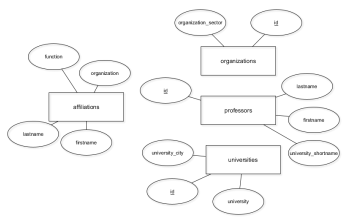

The next database model
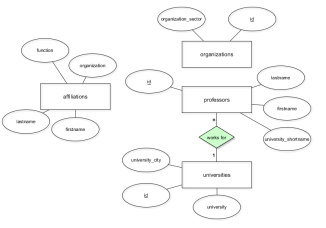

Implementing relationships with foreign keys
- A foreign key (FK) points to the primary key (PK) of another table
- Domain of FK must be equal to domain of PK
- Each value of FK must exist in PK of the other table (FK constraint or "referential integrity")
- FKs are not actual keys

A query

In [ ]:
SELECT * FROM professors LIMIT 8;
SELECT * FROM universities;

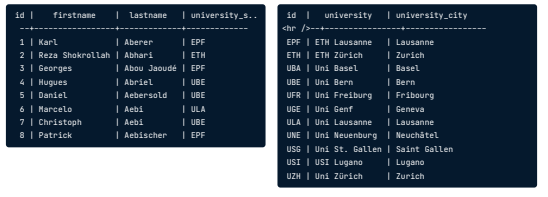

#### REFERENCE 

Specifying foreign keys

In [ ]:
CREATE TABLE manufacturers (
    name varchar(255) PRIMARY KEY
);
INSERT INTO manufacturers
VALUES ('Ford'), ('VW'), ('GM');

CREATE TABLE cars (
    model varchar(255) PRIMARY KEY,
    manufacturer_name varchar(255) REFERENCES manufacturers (name));
INSERT INTO cars
VALUES ('Ranger','Ford'), ('Beetle','VW');

-- Throws an error!
INSERT INTO cars
VALUES ('Tundra','Toyota'); #do not exist in our 3 manufacturers list

#### REFERENCE with a FOREIGN KEY 

Specifying foreign keys to existing tables

In [ ]:
ALTER TABLE a
ADD CONSTRAINT a_fkey FOREIGN KEY (b_id) REFERENCES b (id);

REFERENCE a table with a FOREIGN KEY

In your database, you want the professors table to reference the universities table. You can do that by specifying a column in professors table that references a column in the universities table.

As just shown in the video, the syntax for that looks like this:

- ALTER TABLE a 
- ADD CONSTRAINT a_fkey FOREIGN KEY (b_id) REFERENCES b (id);

Table a should now refer to table b, via b_id, which points to id. a_fkey is, as usual, a constraint name you can choose on your own.

Pay attention to the naming convention employed here: Usually, a foreign key referencing another primary key with name id is named x_id, where x is the name of the referencing table in the singular form.

In [ ]:
#Example
-- Rename the university_shortname column
ALTER TABLE professors
RENAME COLUMN university_shortname TO university_id;

-- Add a foreign key on professors referencing universities
ALTER TABLE professors 
ADD CONSTRAINT professors_fkey FOREIGN KEY (university_id) REFERENCES universities (id);

In [ ]:
#Example
-- Try to insert a new professor
INSERT INTO professors (firstname, lastname, university_id)
VALUES ('Albert', 'Einstein', 'UZH');

#### JOIN linked by a foreign key

JOIN tables linked by a foreign key

Let's join these two tables to analyze the data further!

You might already know how SQL joins work from the Intro to SQL for Data Science course (last exercise) or from Joining Data in PostgreSQL.

Here's a quick recap on how joins generally work:

- SELECT ...
- FROM table_a
- JOIN table_b
- ON ...
- WHERE ...

While foreign keys and primary keys are not strictly necessary for join queries, they greatly help by telling you what to expect. For instance, you can be sure that records referenced from table A will always be present in table B – so a join from table A will always find something in table B. If not, the foreign key constraint would be violated.a

In [ ]:
#Example
-- Select all professors working for universities in the city of Zurich
SELECT professors.lastname, universities.id, universities.university_city
FROM professors
JOIN universities
ON professors.university_id = universities.id
WHERE universities.university_city = 'Zurich';

# só virão as colunas que foram previamente selecionadas no select, sem o prefixo do database

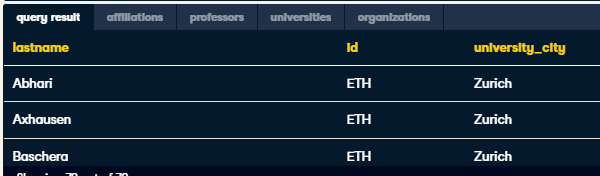

### Model more complex relationships

The current database model
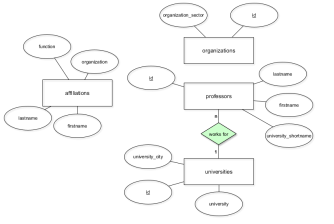

The final database model
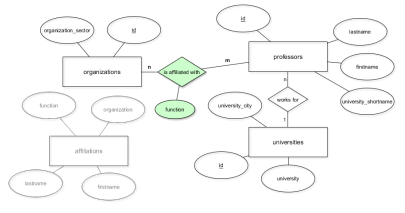

How to implement N:M-relationships
- Create a table
- Add foreign keys for every connected table
- Add additional aributes

In [ ]:
CREATE TABLE affiliations (
    professor_id integer REFERENCES professors (id),
    organization_id varchar(256) REFERENCES organizations (id),
    function varchar(256)
);

- No primary key!
- Possible PK = {professor_id, organization_id, function}

In [ ]:
#Example
-- Add a professor_id column
ALTER TABLE affiliations
ADD COLUMN professor_id integer REFERENCES professors (id);

-- Rename the organization column to organization_id
ALTER TABLE affiliations
RENAME organization TO organization_id;

-- Add a foreign key on organization_id
ALTER TABLE affiliations
ADD CONSTRAINT affiliations_organization_fkey FOREIGN KEY (organization_id) REFERENCES organizations (id);

Perfect! Making organization_id a foreign key worked flawlessly because these organizations actually exist in the organizations table. That was only the first part, though. Now it's time to update professor_id in affiliations – so that it correctly refers to the corresponding professors.

#### UPDATE/SET 

Populate the "professor_id" column

Now it's time to also populate professors_id. You'll take the ID directly from professors.

Here's a way to update columns of a table based on values in another table:

- UPDATE table_a
- SET column_to_update = table_b.column_to_update_from
- FROM table_b
- WHERE condition1 AND condition2 AND ...;

This query does the following:
- For each row in table_a, find the corresponding row in table_b where condition1, condition2, etc., are met.
- Set the value of column_to_update to the value of column_to_update_from (from that corresponding row).

The conditions usually compare other columns of both tables, e.g. table_a.some_column = table_b.some_column. Of course, this query only makes sense if there is only one matching row in table_b.

In [ ]:
#Example
-- Have a look at the 10 first rows of affiliations
SELECT *
FROM affiliations
LIMIT 10;

-- Update professor_id to professors.id where firstname, lastname correspond to rows in professors
UPDATE affiliations
SET professor_id = professors.id
FROM professors
WHERE affiliations.firstname = professors.firstname AND affiliations.lastname = professors.lastname;

-- Have a look at the 10 first rows of affiliations again
SELECT *
FROM affiliations
LIMIT 10;

In [ ]:
#Example
-- Drop the firstname column
ALTER TABLE affiliations
DROP COLUMN firstname;

-- Drop the lastname column
ALTER TABLE affiliations
DROP COLUMN lastname;

### Referential integrity

Referential integrity
- A record referencing another table must refer to an existing record in that table
- Specified between two tables
- Enforced through foreign keys

Referential integrity violations

Referential integrity from table A to table B is violated...
- ...if a record in table B that is referenced from a record in table A is deleted.
- ...if a record in table A referencing a non-existing record from table B is inserted.
- Foreign keys prevent violations!

Dealing with violations

In [ ]:
CREATE TABLE a (
    id integer PRIMARY KEY,
    column_a varchar(64),
    ...,
    b_id integer REFERENCES b (id) ON DELETE NO ACTION --by default
);

CREATE TABLE a (
    id integer PRIMARY KEY,
    column_a varchar(64),
    ...,
    b_id integer REFERENCES b (id) ON DELETE CASCADE -- deletion on table cascaded
);

Dealing with violations, contd.

ON DELETE...
- ...NO ACTION: Throw an error
- ...CASCADE: Delete all referencing records
- ...RESTRICT: Throw an error
- ...SET NULL: Set the referencing column to NULL
- ...SET DEFAULT: Set the referencing column to its default value

#### Change referential integrity 

Change the referential integrity behavior of a key

So far, you implemented three foreign key constraints:

- professors.university_id to universities.id
- affiliations.organization_id to organizations.id
- affiliations.professor_id to professors.id

These foreign keys currently have the behavior ON DELETE NO ACTION. Here, you're going to change that behavior for the column referencing organizations from affiliations. If an organization is deleted, all its affiliations (by any professor) should also be deleted.

Altering a key constraint doesn't work with ALTER COLUMN. Instead, you have to DROP the key constraint and then ADD a new one with a different ON DELETE behavior.

For deleting constraints, though, you need to know their name. This information is also stored in information_schema.

In [ ]:
#Example
-- Identify the correct constraint name
SELECT constraint_name, table_name, constraint_type
FROM information_schema.table_constraints
WHERE constraint_type = 'FOREIGN KEY';

-- Drop the right foreign key constraint
ALTER TABLE affiliations
DROP CONSTRAINT affiliations_organization_id_fkey;

-- Add a new foreign key constraint from affiliations to organizations which cascades deletion
ALTER TABLE affiliations
ADD CONSTRAINT affiliations_organization_id_fkey FOREIGN KEY (organization_id) REFERENCES organizations (id) ON DELETE CASCADE;

-- Delete an organization 
DELETE FROM organizations 
WHERE id = 'CUREM';

-- Check that no more affiliations with this organization exist
SELECT * FROM affiliations
WHERE organization_id = 'CUREM';

### Roundup

How you've transformed the database
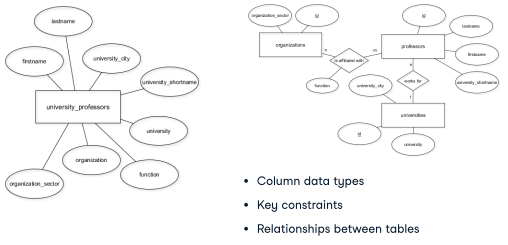

The database ecosystem
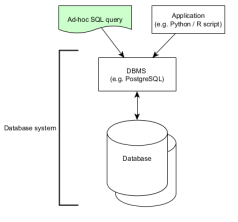

Count affiliations per university

Now that your data is ready for analysis, let's run some exemplary SQL queries on the database. You'll now use already known concepts such as grouping by columns and joining tables.

In this exercise, you will find out which university has the most affiliations (through its professors). For that, you need both affiliations and professors tables, as the latter also holds the university_id.

As a quick repetition, remember that joins have the following structure:

- SELECT table_a.column1, table_a.column2, table_b.column1, ... 
- FROM table_a
- JOIN table_b 
- ON table_a.column = table_b.column

This results in a combination of table_a and table_b, but only with rows where table_a.column is equal to table_b.column.

In [ ]:
#Example
-- Count the total number of affiliations per university
SELECT COUNT(*), professors.university_id 
FROM affiliations
JOIN professors
ON affiliations.professor_id = professors.id
-- Group by the university ids of professors
GROUP BY professors.university_id
ORDER BY count DESC;

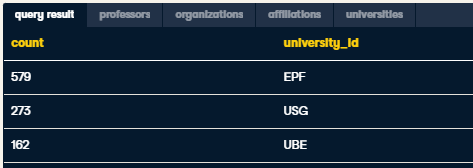

In [ ]:
#Example
-- Filter the table and sort it

SELECT COUNT(*), organizations.organization_sector, 
professors.id, universities.university_city

FROM affiliations

JOIN professors
ON affiliations.professor_id = professors.id

JOIN organizations
ON affiliations.organization_id = organizations.id

JOIN universities
ON professors.university_id = universities.id

WHERE organizations.organization_sector = 'Media & communication'

GROUP BY organizations.organization_sector, 
professors.id, universities.university_city

ORDER BY count DESC;